**liberaries and data import**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('synthetic_sales.csv')

**SMA model** 

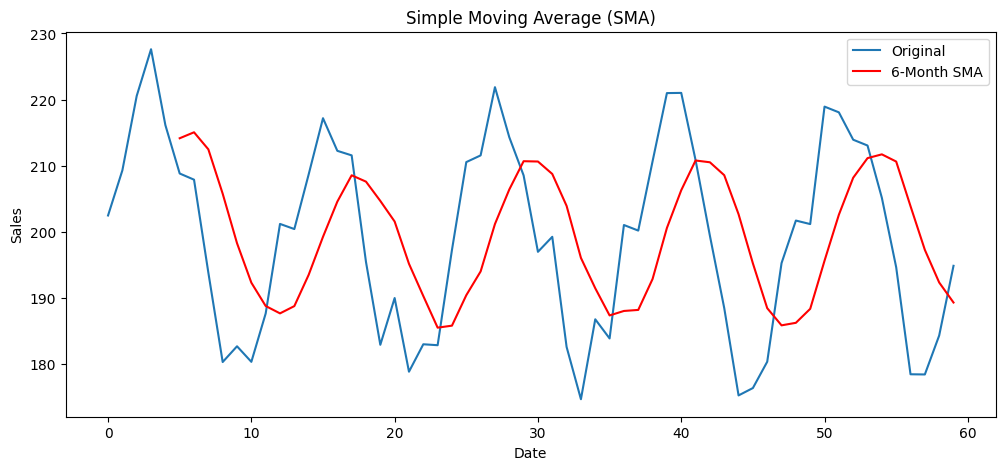

In [2]:
from statsmodels.tsa.ar_model import AutoReg

# --- Simple Moving Average (SMA) ---
df['SMA_6'] = df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(12,5))
plt.plot(df['Sales'], label="Original")
plt.plot(df['SMA_6'], label="6-Month SMA", color='red')
plt.title("Simple Moving Average (SMA)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()



**Autoregressive model**

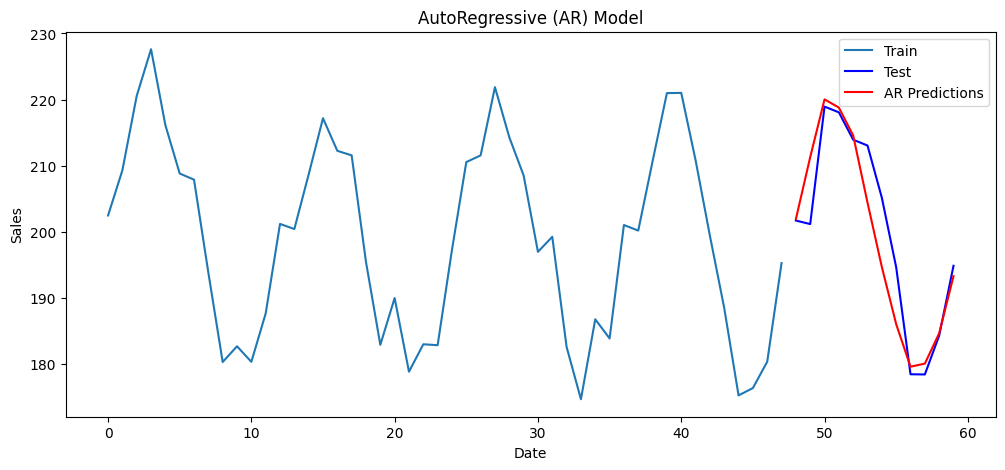

In [3]:
# --- AutoRegressive (AR) model ---
train = df['Sales'][:-12]
test = df['Sales'][-12:]

ar_model = AutoReg(train, lags=6).fit()
pred = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='blue')
plt.plot(test.index, pred, label="AR Predictions", color='red')
plt.title("AutoRegressive (AR) Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()